# Renewables in the electricity mix


## Analyse de la part d'EnR dans l'électricité à l'échelle mondiale - focus sur l'Europe et la France 
---

## Introduction

Les données ont été récupérés sur le site our world in data : https://ourworldindata.org/renewable-energy

Il s'agit des pourcentages d'électricité hydraulique et provenant d'autres EnR dans la production d'électricité, pays par pays, continent par contient sur plus d'un siècle.

---
## 1. Exploration des données / sélection / nettoyage

Cette étape consiste à se familiariser avec les données, comprendre les colonnes, ce que couvre les données. Puis quelles sont les valeurs manquantes ou celles qui nous intéressent vraiment ? On prépare la data pour ensuite l'exploiter. NOus allons utiliser pandas qui permet de traiter des données numériques et des chaines de caractères pour des données qui ne sont pas trop volumineuses (notre fichier fait moins de 1 mega)

In [1]:
# import de toutes les bibliothèques nécessaires

# pour la manipulation de données 
import numpy as np
import pandas as pd

# pour les graphiques
import seaborn as sns
import matplotlib.pyplot as plt

# change l'affichage du nbre de cols
pd.options.display.max_columns = 20

# enlève les warnings en rose
import warnings
warnings.filterwarnings("ignore")

1er aperçu sous forme de tableau afin de se rendre compte des colonnes et de leurs significiations

In [2]:
# charge le fichiers dans un dataframe df et affiche les 5 premières lignes
df = pd.read_csv("renewables-share-electricity-production.csv")
df.head()

,Entity,Code,Year,Hydroelectric sources (Rate),Other renewable sources (Rate)
0,Albania,ALB,1971,57.142857,0.0
1,Albania,ALB,1972,62.068966,0.0
2,Albania,ALB,1973,66.216216,0.0
3,Albania,ALB,1974,68.421053,0.0
4,Albania,ALB,1975,71.910112,0.0


Le bas du tableau permet de se faire se rendre compte que les données sont similaires partout et couvrent des années jusqu'à 2015

In [3]:
# affiche les 5 dernières lignes
df.tail()

,Entity,Code,Year,Hydroelectric sources (Rate),Other renewable sources (Rate)
8015,Zimbabwe,ZWE,2011,56.434462,1.421441
8016,Zimbabwe,ZWE,2012,58.567858,1.825492
8017,Zimbabwe,ZWE,2013,52.204807,1.734587
8018,Zimbabwe,ZWE,2014,54.169160,1.436266
8019,Zimbabwe,ZWE,2015,51.395612,1.328664


De quelle manière les grandeurs sont représentées ? Les valeurs numériques sont représentées de la bonne manière :

In [4]:
# affiche les types des colonnes object = string, int = entier, float = valeur num à virgule
df.dtypes

Entity                             object
Code                               object
Year                                int64
Hydroelectric sources (Rate)      float64
Other renewable sources (Rate)    float64
dtype: object

Notre enregistrement possède 8000 lignes environ pour 5 colonnes

In [5]:
# taille du dataframe df
df.shape

(8020, 5)

On constate que les valeurs sont données par pays, les continents sont découpés en sous partie, la colonne World totalise tous les pays :

In [6]:
# nbre de valeurs uniques dans la colonne entity
df['Entity'].unique()

array(['Albania', 'Algeria', 'Angola', 'Arab World', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cameroon', 'Canada',
       'Central Europe and the Baltics', 'Chile', 'China', 'Colombia',
       'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Curacao', 'Cyprus', 'Czech Republic',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'Early-demographic dividend', 'East Asia & Pacific',
       'East Asia & Pacific (IDA & IBRD)',
       'East Asia & Pacific (excluding high income)', 'Ecuador', 'Egypt',
       'El Salvador', 'Eritrea', 'Estonia', 'Ethiopia', 'Euro area',
       'Europe & Central Asia', 'Europe & Central Asia (IDA & IBRD)',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Finland', 'Fragile and conflict a

Il n'y a pas le même nombre d'enregistrements selon les pays :

In [7]:
df['Entity'].value_counts()

Belgium                                          56
Norway                                           56
Poland                                           56
New Zealand                                      56
Finland                                          56
United Kingdom                                   56
Germany                                          56
United States                                    56
Turkey                                           56
North America                                    56
Japan                                            56
Luxembourg                                       56
Canada                                           56
Euro area                                        56
Denmark                                          56
Ireland                                          56
Iceland                                          56
Spain                                            56
High income                                      56
European Uni

Quels sont les annees dont nous possédons un enregistrement :

In [8]:
# nbre de valeurs uniques dans la colonne entity
print(sorted(df['Year'].unique()))

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


De la même manière toutes les années ne possèdent pas le même nombre de lignes ou d'enregistrements :

In [9]:
# selectionne seulement la colonne année et donne le nombre de lines par valeurs distinctes avec la méthode value count :
df['Year'].value_counts()

2015    185
2014    185
2012    185
2013    185
2005    184
2011    184
2008    184
2007    184
2010    184
2006    184
2009    184
2000    183
2004    183
2001    183
2003    183
2002    183
1996    180
1997    180
1995    180
1999    180
1998    180
1992    179
1993    179
1994    179
1991    178
1990    177
1988    156
1987    156
1989    156
1985    156
1986    156
1984    155
1983    155
1982    155
1981    155
1980    154
1975    154
1976    154
1979    154
1973    154
1977    154
1974    154
1978    154
1971    153
1972    153
1965     32
1969     32
1967     32
1966     32
1970     32
1968     32
1961     31
1963     31
1962     31
1964     31
1960     31
Name: Year, dtype: int64

A-t-on le même nombre d'enregistrement à partir des années 90 ? a peu près :

In [10]:
# selectionne dans le DF que les lignes pour des années supérieures à 1990, et pour la colonne Year -> value count
df[df['Year'] > 1990]['Year'].value_counts()

2015    185
2012    185
2013    185
2014    185
2006    184
2005    184
2009    184
2011    184
2008    184
2010    184
2007    184
2004    183
2003    183
2001    183
2000    183
2002    183
1998    180
1996    180
1995    180
1999    180
1997    180
1994    179
1993    179
1992    179
1991    178
Name: Year, dtype: int64

Avant 70 toutes les années ne sont pas représentés. De plus a-t-on des données fiables pour années très reculées / anciennes ? on peut en douter mais pour s'en assurer il faudrait mener une enquête sur la provenance des données , comment elles ont été collectés etc... . Ici, on garde donc les infos qu'à partir de 1970 pour notre analyse :

In [11]:
# reaffecte au dataframe que les lignes dont l'année est supérieure à 1970
df = df[df['Year'] >= 1970]

# sauvegarde du fichier :
df.to_csv("tous_pays_depuis_1970.csv")

# pour vérifier regardons si le nbre de lignes a bien diminué :
df.shape

(7705, 5)

Avec notre 1ère sélection sur les années, il ne reste pas des données inconnues sauf pour le code, ce qui n'est pas important. Nombre de valeurs manquantes "Nan" dans nos données par colonne : 

In [12]:
df.isnull().sum()

Entity                               0
Code                              1948
Year                                 0
Hydroelectric sources (Rate)         0
Other renewable sources (Rate)       0
dtype: int64

---

## 2. Data Analysis

Dans notre analyse nous allons commencer par une étude du monde entier, puis plus spécifiquement sur l'europe et un focus sur la france.

In [13]:
# selection des seules lignes concernant le monde entier
temp_df = df[df['Entity'] == 'World']

# suppression des colonnes inutiles
temp_df = temp_df.drop(columns=['Entity', 'Code'])
temp_df = temp_df.set_index('Year')

# aperçu du début du dataframe
temp_df.head()

,Hydroelectric sources (Rate),Other renewable sources (Rate)
Year,,
1971,20.211718,0.251909
1972,19.728410,0.247095
1973,18.594712,0.263579
1974,20.285326,0.246671
1975,20.046049,0.269361


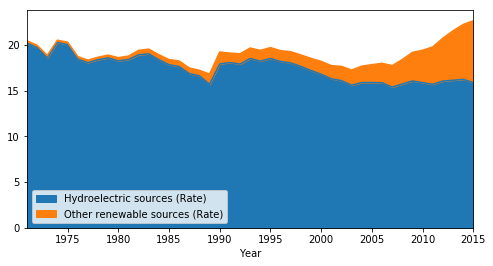

In [14]:
# affichage du graphe
temp_df.plot.area(figsize=(8, 4))

### Evolution par continent

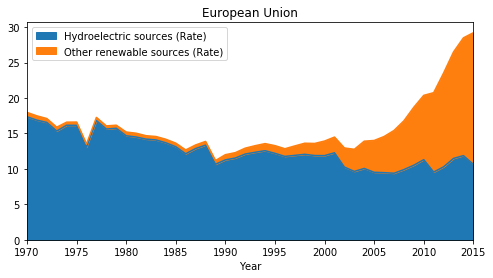

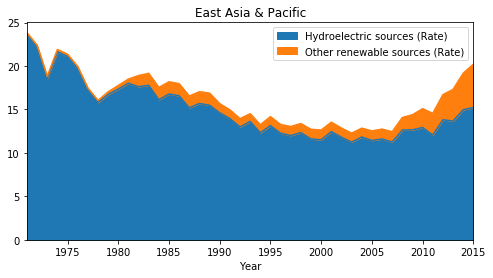

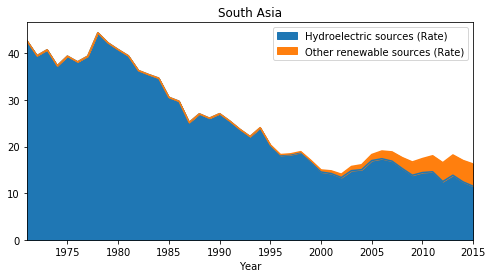

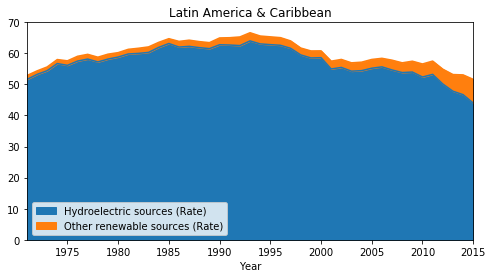

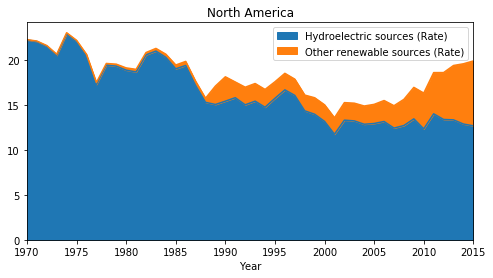

In [15]:
continents = ['European Union', 'East Asia & Pacific', 'South Asia', 'Latin America & Caribbean', 'North America']
for c in continents:
    # selection des seules lignes concernant le monde entier
    temp_df = df[df['Entity'] == c]

    # suppression des colonnes inutiles
    temp_df = temp_df.drop(columns=['Entity', 'Code'])
    temp_df = temp_df.set_index('Year')
    
    # affichage du graphe
    temp_df.plot.area(figsize=(8, 4), title=c)

### Focus sur l'Europe

Créons la liste des pays d'europe pour s'en servir dans notre analyse

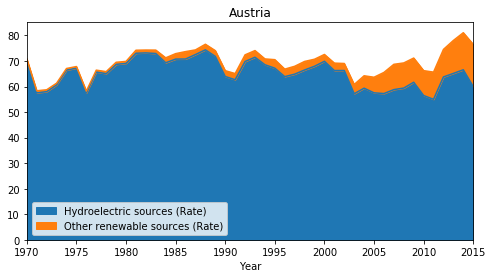

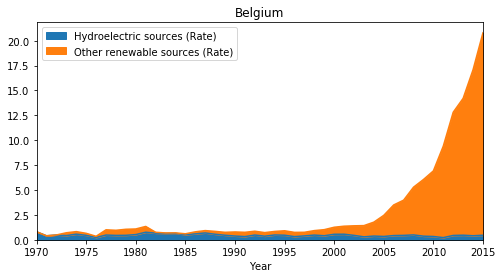

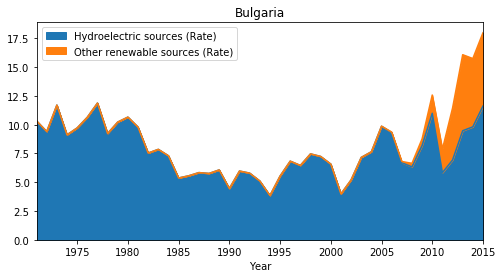

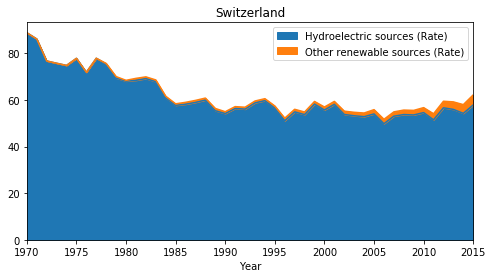

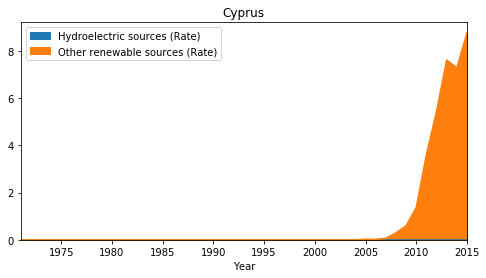

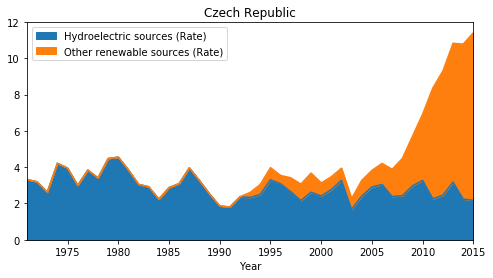

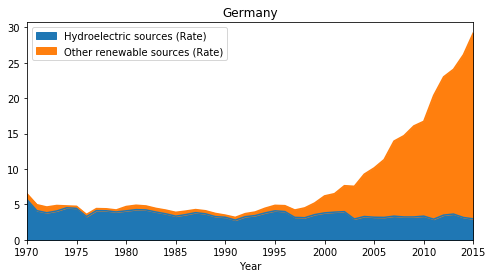

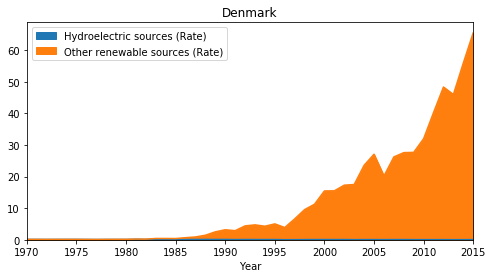

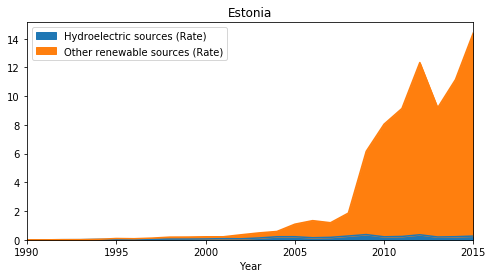

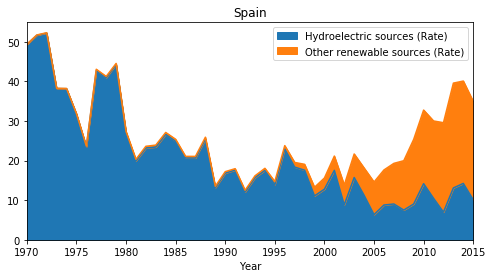

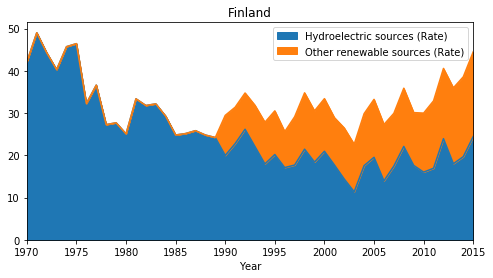

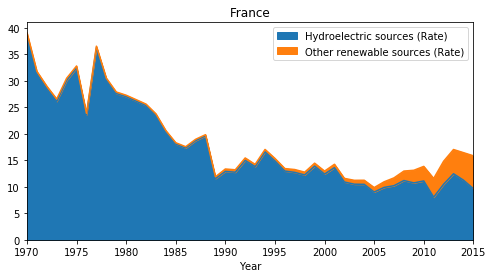

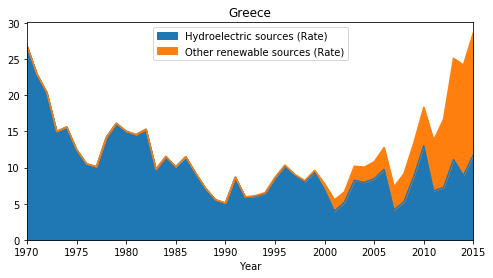

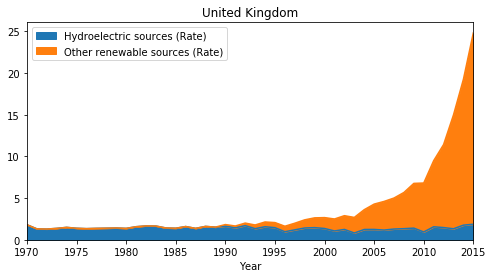

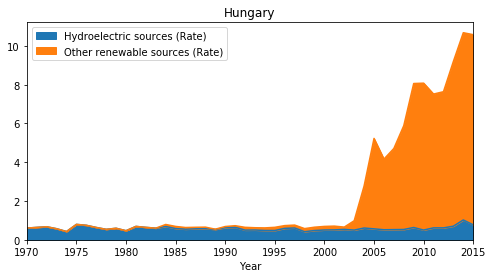

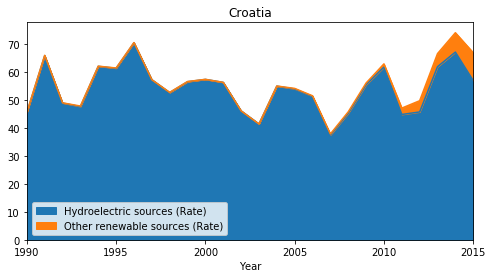

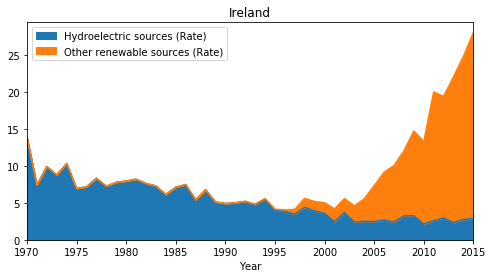

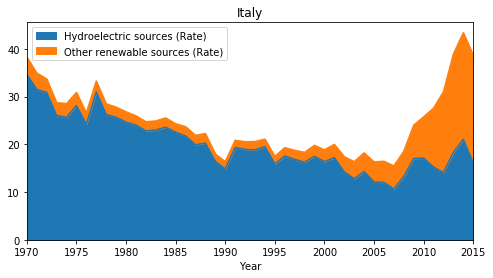

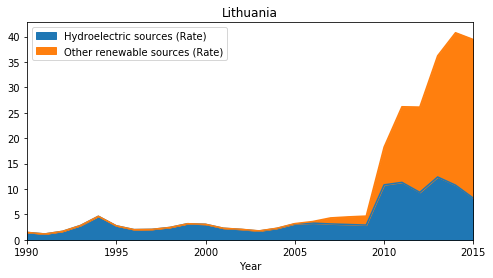

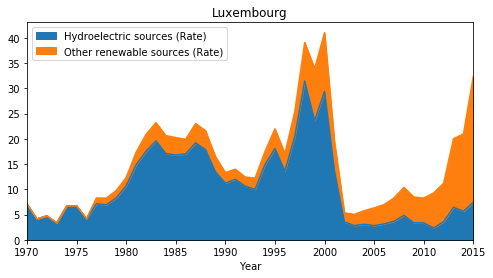

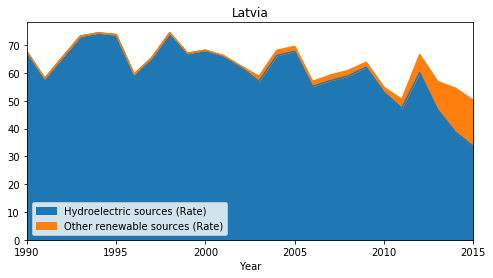

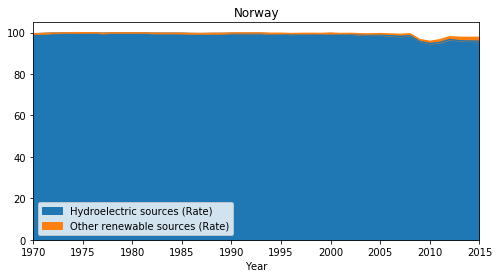

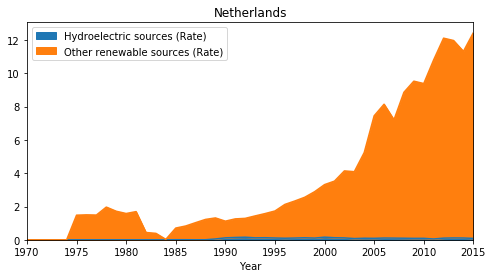

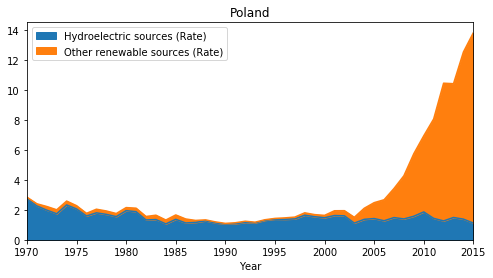

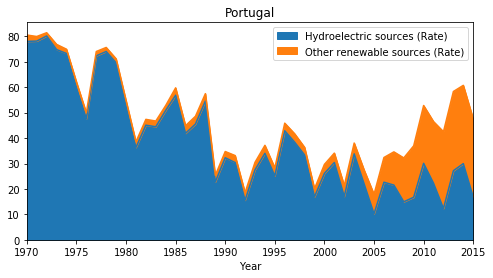

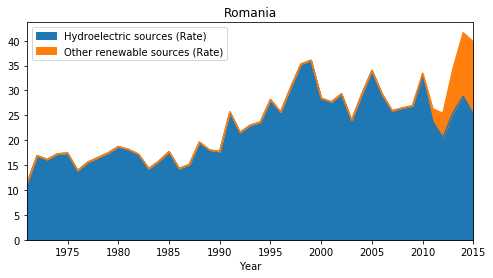

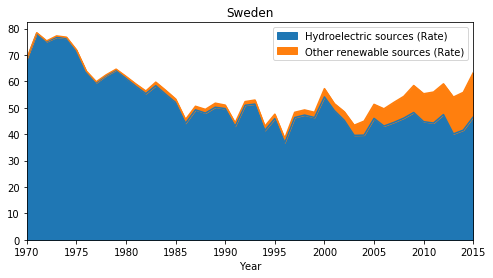

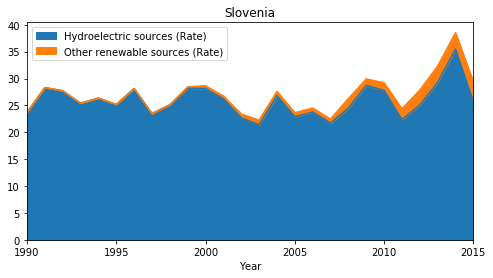

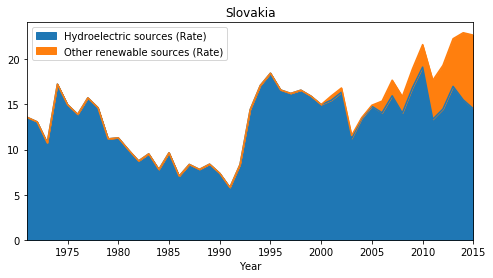

In [16]:
pays_europe = [
    'Austria',
    'Belgium',
    'Bulgaria',
    'Switzerland',
    'Cyprus',
    'Czech Republic',
    'Germany',
    'Denmark',
    'Estonia',
    'Spain',
    'Finland',
    'France',
    'Greece',
    'United Kingdom',
    'Hungary',
    'Croatia',
    'Ireland',
    'Italy',
    'Lithuania',
    'Luxembourg',
    'Latvia',
    'Norway',
    'Netherlands',
    'Poland',
    'Portugal',
    'Romania',
    'Sweden',
    'Slovenia',
    'Slovakia'
]

for c in pays_europe:
    # selection des seules lignes concernant le monde entier
    temp_df = df[df['Entity'] == c]

    # suppression des colonnes inutiles
    temp_df = temp_df.drop(columns=['Entity', 'Code'])
    temp_df = temp_df.set_index('Year')
    
    # affichage du graphe
    temp_df.plot.area(figsize=(8, 4), title=c)

---

# Conclusions



On peut constater au sein de l'U.E des profils énergétiques de pays très différents :
- certains comme les pays bas, le danmeark, la hongris, l'UK, ne possède que très peu d'énergy hydro, mais la proportion des autres EnR a littéralement explosé au cours des dernières années.
- d'autres conservent une grosse part d'hydro et developpent peu les alternatives : norvège, la croatie, la suisse, l'autriche...
- puis certains tente de diversifier leurs sources : portugal, italie, grèce...